# Relaxation Methods for Partial Diﬀerential Equations

* Author: Pochung Chen
* Email: pcchen@phys.nthu.edu.tw

Last updated on 11/8/2021

## Physics background

For a region of space containing a charge density $\rho$, the electrostatic potential $V$ satisfies **Poission's equation**:

$$
  \nabla^2 V 
  = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}
  = -\frac{1}{\epsilon_0} \rho.
$$

When $\rho=0$ Poission's equation reduces to **Laplace's equation**:

$$
  \nabla^2 V
  = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}
  = 0.
$$

From the potential we can derive the electric field,
$$
  \vec{E}
  = -\vec{\nabla}V
  = \left(-\frac{\partial V}{\partial x}, -\frac{\partial V}{\partial y}, -\frac{\partial V}{\partial z}\right).
$$


## Discretization and the relaxation method

We consider a mesh of grid points that covers the domain of interest. For simplicity we assume in each direction the spacing between grid points is $h$.

$$
  (x_i, y_j, z_k) = (x_0, y_0, z_0) + h (i, j, k).
$$

We need to find the discretized version of the differential operator $\nabla^2$.

We first Taylor expand $V(x,y,z)$ in $x$ to second order:

$$
  V(x\pm h,y,z) = V(x,y,z) \pm h \frac{\partial V}{\partial x} + \frac{1}{2}h^2 \frac{\partial^2 V}{\partial x^2} + \cdots
$$

so that

$$
  \frac{\partial^2 V}{\partial x^2} \approx \frac{V(x+h)+V(x-h)-2V(x)}{h^2}
$$
and similarly for $y$ and $z$.

We hence obtain the discrete approximation to the laplacian:

$$
  \nabla^2 V \approx
  \frac{V(x+h,y,z)+V(x-h,y,z)-2V(x,y,z)}{h^2} + \frac{V(x,y+h,z)+V(x,y-h,z)-2V(x,y,z)}{h^2} + \frac{V(x,y,z+h)+V(x,y,z-h)-2V(x,y,z)}{h^2}
$$

## Laplace's equation

If we use a grid notation
* $V(x, y, z)=V_{i,j,k}$
* $V(x+h, y, z)=V_{i+1, j, k}$
* $V(x, y+h, z)=V_{i, j+1, k}$
* $V(x, y, z+h)=V_{i, j, k+1}$

then the discretized verion of Laplace's equation becomes

$$
  h^2 \nabla^2 V = 0 \approx 
  \left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right)
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} \right).
$$



## Poission's equation

If charges are present. First we replace the charge density $\rho(x,y,z)$ by a discrete distribution $\rho_{i,j,k}=\rho(x_i,y_j,z_k)$.

The discretized version of Poisson's equation becomes

$$
  h^2 \nabla^2 V = -h^2 \frac{1}{\epsilon_0} \rho_{i,j,k} \approx 
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} + \frac{1}{\epsilon_0}h^3\rho_{i,j,k} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} + \frac{1}{\epsilon_0}h^2\rho_{i,j,k} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} + \frac{1}{\epsilon_0}h\rho_{i,j,k} \right).
$$


### Exact solution in 1D
In 1D, the Laplace's equation reads

$$
  \frac{d^2 V(x)}{dx^2} = 0.
$$

The solution has the form $V(x)=ax+b$ where $a$ and $b$ are constants.

## Tasks: Jacobi method and Gauss-Seidel method

* Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions. 
* Allow the potentials on all four sides to be specified arbitrarily. 
* The number of grid point can be changed.

#### Jacobi and Gauss-Seidel methods

* Study the relative speed of the Jacobi and Gauss-Seidel methods.

Text(0.5, 0, 'Gauss–Seidel Method')

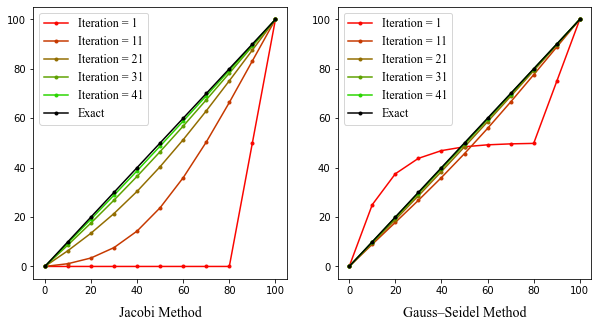

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), sharex=True)

fineness = 10
iteration = 50

v_start = 0
v_end   = 100
v_total = (v_end - v_start)/fineness + 1

x_start = 0
x_end   = 100
x_total = v_total

Start_R, Start_G, Start_B = 1, 0, 0
End_R,   End_G,   End_B   = 0, 1, 0

v_array = np.linspace(v_start, v_end, int(v_total))
x_array = np.linspace(x_start, x_end, int(x_total))

R_array = np.linspace(Start_R, End_R, iteration)
G_array = np.linspace(Start_G, End_G, iteration)
B_array = np.linspace(Start_B, End_B, iteration)

vj = np.zeros(int(v_total))
vj[0] = v_start
vj[int(v_total)-1] = v_end

for i in range(1, iteration+1):
    for j in range(1, int(v_total)-1):
        vj[j] = (vj[j-1] + vj[j+1])/2
    if (i % 10 == 1):
        label_name = r'Iteration = ' + str('%d' % i)
        p[0].plot(x_array, vj, '.-', color = [R_array[i], G_array[i], B_array[i]], label = label_name)

p[0].plot(x_array, v_array, '.-k', label = 'Exact')
Lj = p[0].legend(loc='upper left', fontsize=12)
plt.setp(Lj.texts, family='Times New Roman')

vg = np.ones(int(v_total))*(v_start+v_end)/2
vg[0] = v_start
vg[int(v_total)-1] = v_end

for i in range(1, iteration+1):
    for j in range(1, int(v_total)-1):
        vg[j] = (vg[j-1] + vg[j+1])/2
    if (i % 10 == 1):
        label_name = r'Iteration = ' + str('%d' % i)
        p[1].plot(x_array, vg, '.-', color = [R_array[i], G_array[i], B_array[i]], label = label_name)

p[1].plot(x_array, v_array, '.-k', label = 'Exact')
Lg = p[1].legend(loc='upper left', fontsize=12)
plt.setp(Lg.texts, family='Times New Roman')

p[0].set_xlabel('Jacobi Method', fontsize=14, labelpad=10, fontname='Times New Roman')
p[1].set_xlabel('Gauss–Seidel Method', fontsize=14, labelpad=10, fontname='Times New Roman')

### Initial conditions

* Study if the initial guess have a significant impact on overall speed.

## Tasks: Contour plots (equipotentials) and electric field 

* Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions. 
* Allow the potentials on all four sides to be specified arbitrarily. 
* The number of grid point can be changed.
* Use Jacobi method or Gauss-Seidel method.
* Use some good initial guess.
* Plot the equipotentials.
* Plot the electric fields.

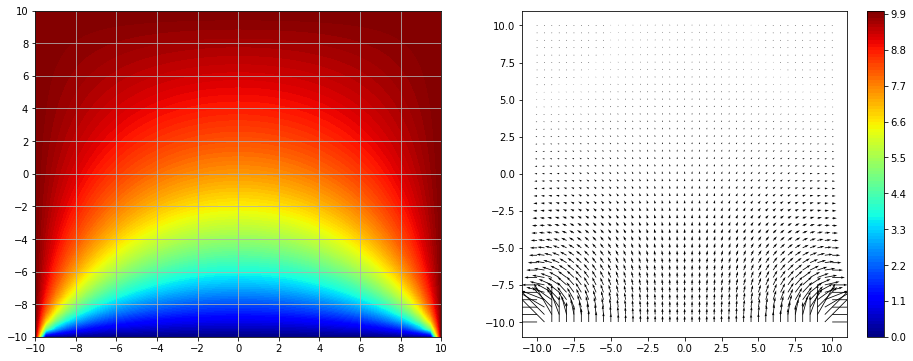

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))

fineness = 0.5
iteration = 1000
levels = 100

x_start = -10
x_end   = +10
x_total = (x_end - x_start)/fineness + 1

y_start = -10
y_end   = +10
y_total = x_total

x_array = np.linspace(x_start, x_end, int(x_total))
y_array = np.linspace(y_start, y_end, int(y_total))

vjX, vjY = np.meshgrid(x_array, y_array, indexing = 'ij')
vjZ = np.zeros_like(vjX)


# 邊界條件
BCL, BCR, BCU, BCD = (10, 10, 10, 0)
vjZ[:, 0] = BCD
vjZ[:, int(y_total)-1] = BCU
vjZ[0, :] = BCL
vjZ[int(x_total)-1, :] = BCR

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            vjZ[i, j] = (vjZ[i-1, j] + vjZ[i+1, j] + vjZ[i, j-1] + vjZ[i, j+1])/4


Ex, Ey = np.gradient(vjZ)

p[0].set_xticks(np.linspace(-10, 10, 11))
p[0].set_yticks(np.linspace(-10, 10, 11))
pvj = p[0].contourf(vjX, vjY, vjZ, levels, cmap=cm.jet)

fig.colorbar(pvj)
p[0].grid()

# for electric field
#p[1].streamplot(vjX, vjY, Ex, Ey)
p[1].quiver(vjX, vjY, Ex, Ey)

## Tasks: Adding charges

* Modify your code to allow point charges to be placed at arbitrary mesh points.

### Single charge

* Compute the potential due to a single charge.
* Verify that the potential falls off logarithmically, i.e., if $r\rightarrow 2r$ then the potential decreases by a factor of $\ln 2$ (for a positive charge).

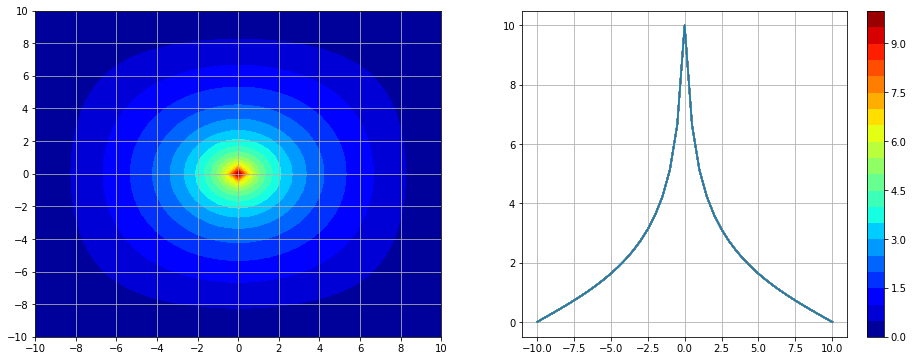

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))

fineness = 0.5
iteration = 1000
levels = 21

x_start = -10
x_end   = +10
x_total = (x_end - x_start)/fineness + 1

y_start = -10
y_end   = +10
y_total = x_total

x_array = np.linspace(x_start, x_end, int(x_total))
y_array = np.linspace(y_start, y_end, int(y_total))

vjX, vjY = np.meshgrid(x_array, y_array, indexing = 'ij')
vjZ = np.zeros_like(vjX)

# 邊界條件

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            vjZ[20, 20] = 10
            vjZ[i, j] = (vjZ[i-1, j] + vjZ[i+1, j] + vjZ[i, j-1] + vjZ[i, j+1])/4

Ex, Ey = np.gradient(vjZ)

p[0].set_xticks(np.linspace(-10, 10, 11))
p[0].set_yticks(np.linspace(-10, 10, 11))
pvj = p[0].contourf(vjX, vjY, vjZ, levels, cmap=cm.jet)

fig.colorbar(pvj)
p[0].grid()

#p[1].plot(vjX, abs(Ex[:, 20]))
p[1].plot(vjX, vjZ[:,20])
p[1].grid()

### Dipole

* Compute the potential due to an electric dipole.
* What is the expected $r$ dependence? 
* Does your results have the expacted behavior?

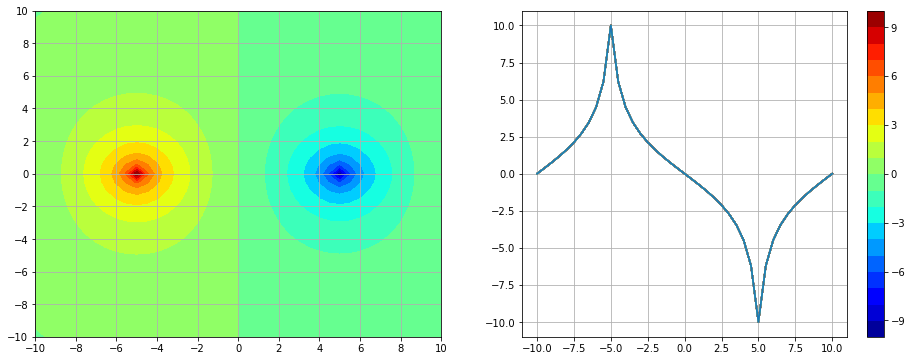

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))

fineness = 0.5
iteration = 1000
levels = 21

x_start = -10
x_end   = +10
x_total = (x_end - x_start)/fineness + 1

y_start = -10
y_end   = +10
y_total = x_total

x_array = np.linspace(x_start, x_end, int(x_total))
y_array = np.linspace(y_start, y_end, int(y_total))

vjX, vjY = np.meshgrid(x_array, y_array, indexing = 'ij')
vjZ = np.zeros_like(vjX)

# 邊界條件

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            vjZ[30, 20] = -10
            vjZ[10, 20] = 10
            vjZ[i, j] = (vjZ[i-1, j] + vjZ[i+1, j] + vjZ[i, j-1] + vjZ[i, j+1])/4

Ex, Ey = np.gradient(vjZ)

p[0].set_xticks(np.linspace(-10, 10, 11))
p[0].set_yticks(np.linspace(-10, 10, 11))
pvj = p[0].contourf(vjX, vjY, vjZ, levels, cmap=cm.jet)

fig.colorbar(pvj)
p[0].grid()

p[1].plot(vjX, vjZ[:,20])
p[1].grid()

## Tasks: Parallesl sheets of charges

* Use your program to calculate the potential for parallel lines of charges.
* Compute the capacitance.


### Method-1

* Use two edges of the domain as the plates.
* Use periodic boundary conditions in the direction along the plates.

### Method-2

* Introduce actual lines of equal and opposite charge **NOT** on the boundaries, and solve Poisson's equation both between and outside the plates.
* Stretch the liens of charges across the domain and impose periodic boundary conditions in the directions along the sheets.
* Impose *anti-periodic* boundary conditions in the direction perpendicular to the sheets (make sure you understand why), i.e., $V_{bottom}=-V_{top}.

### Method-3

* Now consider two finite slabs.
* What are the appropriate boundary conditions.

## Tasks: Concentric rectangles

* Modify your program to solve for $V$between two recrangular boundaries held at constant potential.
* Calculate the surface charge density on the boundary surface. $\lambda = \epsilon_0 \vec{n}\cdot \vec{E}$.
* Determine the totla charge on each surface. How do they compare?
* Determine the capacitance of the system.

## Tasks: Elaborations (Bonus!)

If you are ambitious, try to implement
* Overrelaxation method.
* Multigruid mehtod.